In [ ]:
# Analisis data : SQL atau pandas

In [ ]:
!pip install -q pandasql
!pip install -q SQLAlchemy==1.4.46

In [ ]:
from pandasql import sqldf
import pandas as pd

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS_ft-NJIcHCTKmchMSSlSwc0Eip8E1SpjKOz5d-D4GKM6cRsswAjj6dOa8E9-P1CVs8fZzIgw26SuK/pub?gid=1862798306&single=true&output=csv')

In [ ]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Cek missing values dan tipe data

In [ ]:
# info() -> cek tipe data dan missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  subcategory    9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [ ]:
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
subcategory      0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

# Drop kolom yang terlalu banyak missing values

In [ ]:
df = df.drop(columns=['row_id'])

# Mengubah tipe data

In [ ]:
# ubah date dari object menjadi datetime

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   ship_mode      9994 non-null   object        
 4   customer_id    9994 non-null   object        
 5   customer_name  9994 non-null   object        
 6   segment        9994 non-null   object        
 7   country        9994 non-null   object        
 8   city           9994 non-null   object        
 9   state          9994 non-null   object        
 10  postal_code    9994 non-null   int64         
 11  region         9994 non-null   object        
 12  product_id     9994 non-null   object        
 13  category       9994 non-null   object        
 14  subcategory    9994 non-null   object        
 15  product_name   9994 n

In [ ]:
# postal code ubah jadi string
df['postal_code'] = df['postal_code'].astype(str)

# Membagi ke dalam dua data (numerik dan categorical)

In [ ]:
# pisahkan kolom numerik dengan kolom categorical
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='object')

In [ ]:
df_num.head()

,sales,quantity,discount,profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [ ]:
df_cat.head()

,order_id,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name
0,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [ ]:
# panggil nama nama kolom untuk masing masing df
# kolom_num = ['row_id','postal_code',...,'profit']
# kolom_cat = ['order_id',...,'product_names']

num_cols = df_num.columns
cat_cols = df_cat.columns

print(list(num_cols))
print(list(cat_cols))

['sales', 'quantity', 'discount', 'profit']
['order_id', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'subcategory', 'product_name']


In [ ]:
# Untuk setiap kolom, berapa persentase missing values?
# ex: 'purchase' terdapat 30 missing values dari 1000 data -> 3%

df['sales'].isnull().sum() / len(df)

0.0

In [ ]:
for kolom in df.columns:
  print(kolom)
  print(df[kolom].isnull().sum() / len(df))

order_id
0.0
order_date
0.0
ship_date
0.0
ship_mode
0.0
customer_id
0.0
customer_name
0.0
segment
0.0
country
0.0
city
0.0
state
0.0
postal_code
0.0
region
0.0
product_id
0.0
category
0.0
subcategory
0.0
product_name
0.0
sales
0.0
quantity
0.0
discount
0.0
profit
0.0


In [ ]:
# cara mengecek persentase missing values pada kolom
percent_missing = df.isnull().sum() / len(df)

missing_value_df = pd.DataFrame(
    {
        'nama_kolom' : df.columns,
        'percentage' : percent_missing
    }
).reset_index(drop=True)

missing_value_df

,nama_kolom,percentage
0,order_id,0.0
1,order_date,0.0
2,ship_date,0.0
3,ship_mode,0.0
4,customer_id,0.0
5,customer_name,0.0
6,segment,0.0
7,country,0.0
8,city,0.0
9,state,0.0


In [ ]:
# filter kolom yang punya missing values di atas 30% lalu masukkan ke dalam var columns_to_drop
missing_value_df[missing_value_df['percentage']> 30.0]

,nama_kolom,percentage


In [ ]:
dummy_missing = pd.DataFrame(
    {
        'nama_kolom' : ['a','b','c','d','e'],
        'percent' : [10,20,30,0,5]
    }
)

dummy_missing

,nama_kolom,percent
0,a,10
1,b,20
2,c,30
3,d,0
4,e,5


In [ ]:
# filter nilai di atas / sama dengan 20
col_to_drop = list(dummy_missing[dummy_missing['percent']>=20]['nama_kolom'])

In [ ]:
df.sample()

In [ ]:
# ngisi missing values
# kolom numerik, isi dengan rata-rata
# kolom categorical, isi dengan modus
# df.fillna(nilai_pengganti_null)
# df.fillna('mean')
#help(df.fillna)

#for kolom in df_num:
#  df[kolom].fillna(df[kolom].mean())

In [ ]:
df_num.sample()

In [ ]:
df.sample()

In [ ]:
# membagi num dan cat sebaiknya setelah mengecek missing values -> udah ngga akan drop column lagi setelah itu

df_num = df_num.drop(columns='row_id')

In [ ]:
df_num.sample()

In [ ]:
# mengisi missing values pada numeric dengan rata rata
for kolom in df_num.columns:
  rerata = df[kolom].mean()
  df[kolom].fillna(rerata)

In [ ]:
df['city'].mode()[0]

'New York City'

In [ ]:
# mengisi missing values pada categorical dengan modus
for kolom in df_cat.columns:
  modus = df[kolom].mode()[0]
  df[kolom].fillna(modus)

# Clean Data

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Membangun order_df

In [ ]:
# data summary ['order_id',..,'region',sum of sales & sum of profit]

q = '''
SELECT
  order_id,
  order_date,
  ship_date,
  ship_mode,
  customer_id,
  customer_name,
  segment,
  country,
  city,
  state,
  postal_code,
  region,
  SUM(sales) as sum_of_sales,
  SUM(profit) as sum_of_profit
FROM
  df
GROUP BY
  1,2,3,4,5,6,7,8,9,10,11,12
'''

order_df = sqldf(q)
order_df.head(3)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,sum_of_sales,sum_of_profit
0,CA-2014-100006,2014-09-07 00:00:00.000000,2014-09-13 00:00:00.000000,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024,East,377.970,109.6113
1,CA-2014-100090,2014-07-08 00:00:00.000000,2014-07-12 00:00:00.000000,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,699.192,-19.0890
2,CA-2014-100293,2014-03-14 00:00:00.000000,2014-03-18 00:00:00.000000,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,Florida,32216,South,91.056,31.8696


In [ ]:
# total sales dan profit untuk setiap region
sales_region = pd.pivot_table(
    data=df,
    index='region',
    values = ['sales','profit'],
    aggfunc = 'sum'
).reset_index()

In [ ]:
sales_region

,region,profit,sales
0,Central,39706.3625,501239.8908
1,East,91522.7800,678781.2400
2,South,46749.4303,391721.9050
3,West,108418.4489,725457.8245


# Performa cabang

In [ ]:
q = '''
SELECT
  region,
  SUM(sum_of_sales) revenue,
  SUM(sum_of_profit) profit,
  SUM(sum_of_profit)/SUM(sum_of_sales)*100 as profit_ratio
FROM
  order_df
GROUP BY 1
'''

sqldf(q)

,region,revenue,profit,profit_ratio
0,Central,501239.8908,39706.3625,7.921629
1,East,678781.2400,91522.7800,13.483399
2,South,391721.9050,46749.4303,11.934342
3,West,725457.8245,108418.4489,14.944831


# Produk terlaris

In [ ]:
# product terlaris -> jumlah terjual, revenue

q = '''
SELECT
  product_name,
  SUM(quantity) qty,
  SUM(sales) as revenue,
  SUM(profit) as profit,
  SUM(profit)/SUM(sales) * 100 profit_ratio
FROM
  df
GROUP BY 1
ORDER BY 2 DESC
'''

sqldf(q)

,product_name,qty,revenue,profit,profit_ratio
0,Staples,215,755.470,292.2046,38.678518
1,Staple envelope,170,1686.812,751.6290,44.559145
2,Easy-staple paper,150,2504.192,1096.0292,43.767778
3,Staples in misc. colors,86,478.812,124.0516,25.908206
4,KI Adjustable-Height Table,74,4552.641,-248.4822,-5.457979
...,...,...,...,...,...
1845,Xerox 20,1,6.480,3.1104,48.000000
1846,Penpower WorldCard Pro Card Scanner,1,91.475,-1.8295,-2.000000
1847,Global Enterprise Series Seating Low-Back Swiv...,1,207.184,25.8980,12.500000
1848,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1,119.833,-12.6882,-10.588235


# Mencari produk terlaris untuk setiap kategori

In [ ]:
df['category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

# Mencari produk terlaris untuk setiap kategori di setiap region
Asumsi: bisa jadi terdapat preferensi barang yang dibeli berdasarkan region

# Trend penjualan dari hari ke hari

<Axes: >

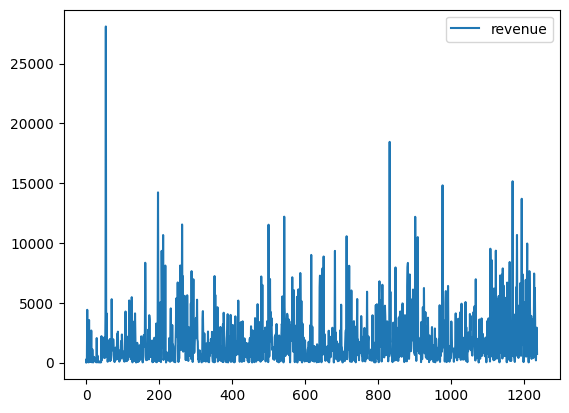

In [ ]:
q = '''
SELECT
  order_date,
  SUM(sales) revenue
FROM
  df
GROUP BY 1
'''

sqldf(q).plot(kind='line')

In [ ]:
regional_sales = pd.pivot_table(
    data=df,
    index='order_date',
    columns='region',
    values='sales',
    aggfunc='sum'
).reset_index().fillna(0)

<Axes: xlabel='order_date'>

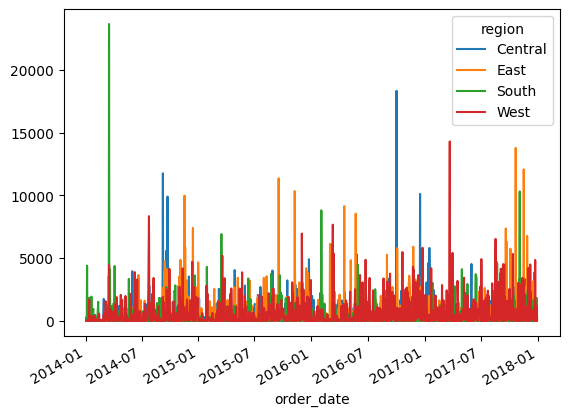

In [ ]:
regional_sales.plot(kind='line',x='order_date')

In [ ]:
regional_sales.head()

region,order_date,Central,East,South,West
0,2014-01-03,16.448,0.000,0.00,0.00
1,2014-01-04,288.060,0.000,0.00,0.00
2,2014-01-05,0.000,19.536,0.00,0.00
3,2014-01-06,0.000,0.000,4387.66,19.44
4,2014-01-07,87.158,0.000,0.00,0.00


In [ ]:
df['month_year'] = df['order_date'].dt.to_period('M')

In [ ]:
df.head(1)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit,month_year
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016-11


In [ ]:
regional_monthly_sales = pd.pivot_table(
    data=df,
    index='month_year',
    columns='segment',
    values='sales',
    aggfunc='sum'
).reset_index().fillna(0)

regional_monthly_sales.head()

segment,month_year,Consumer,Corporate,Home Office
0,2014-01,6927.817,1701.528,5607.550
1,2014-02,3167.854,1183.668,168.370
2,2014-03,11869.304,11106.799,32714.906
3,2014-04,9108.612,14131.729,5055.004
4,2014-05,12819.163,9142.000,1687.124


<Axes: xlabel='month_year'>

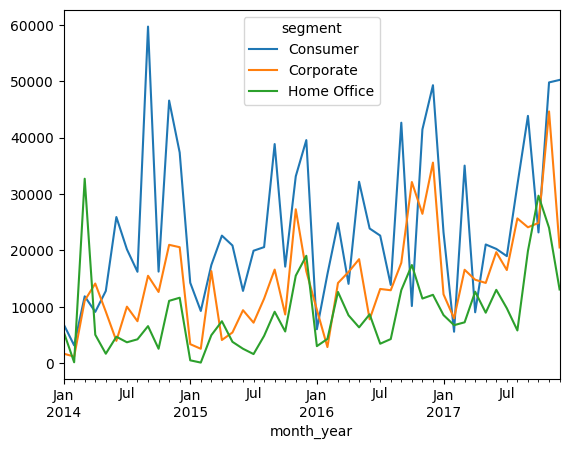

In [ ]:
regional_monthly_sales.plot(kind='line',x='month_year')

In [ ]:
# asfreq, resample, to_period

In [ ]:
# regional_annual_sales

df['year'] = df['order_date'].dt.to_period('Y')

In [ ]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,month_year,year
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016-11,2016
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016-11,2016


In [ ]:
regional_annual_sales = pd.pivot_table(
    data=df,
    index='year',
    columns='segment',
    values='sales',
    aggfunc='sum'
).reset_index().fillna(0)

<Axes: xlabel='year'>

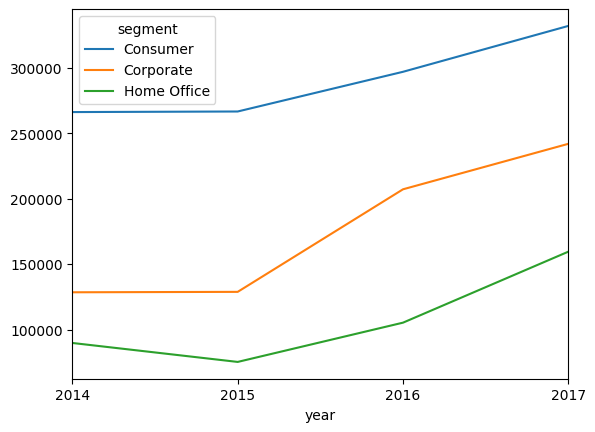

In [ ]:
regional_annual_sales.plot(kind='line', x='year')

In [ ]:
regional_annual_sales = pd.pivot_table(
    data=df,
    index='year',
    columns='region',
    values='sales',
    aggfunc='sum'
).reset_index().fillna(0)

<Axes: xlabel='year'>

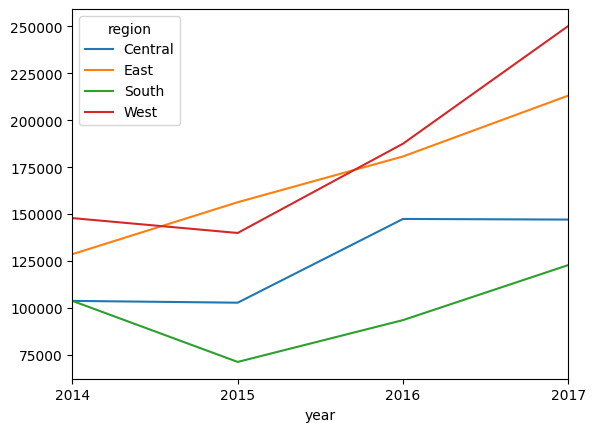

In [ ]:
regional_annual_sales.plot(kind='line', x='year')